## Data Quality Assessment for FCFRD Datasets
This script can be run on each of the datasets. Dataset-specific scripts are written separately.
This script counts and removes duplicate rows, calculates the number of unique values per column, calculates the number/percent of nulls per column, and counts number of rows with the same set of null column(s). It also creates histogram for quick data analysis and counts Nulls/NaN values on a date field.

_Author: A. Upadhyaya_

#### Prepare Analysis


#### Set File Read Parameters

In [1]:
#Run from Git Hub project folder structure (script is in "notebooks" folder)
localFolder='../data/01_raw/'
##localFolder='C:/GMU_Data Analytics Project_DAEN 690/DAEN690_DataFN/'
fileName='20210214-ems-raw-v03.xlsx'
sheetNameMed='Medications'
sheetNameProcs='Procedures'
sheetNamePatnt='Patients'

### Import Libraries

In [2]:
# Importing required libraries for the project
import sys # for python library version
import pandas as pd
##pd.set_option('display.max_colwidth', None)

In [3]:
print('Python: {}'.format(sys.version))  # Python version
##print('numpy: {}'.format(np.__version__))  # Numpy version
print('pandas: {}'.format(pd.__version__))  # Pandas version

Python: 3.8.6 | packaged by conda-forge | (default, Jan 25 2021, 22:54:47) [MSC v.1916 64 bit (AMD64)]
pandas: 1.2.2


#### Import From Excel Spreadsheet

##### Reading 'Medications' tab (dataset)

In [4]:
#Import single tab - Medications
##df=pd.read_excel(localFolder+fileName,sheet_name=sheetName)
dfMed=pd.read_excel(localFolder+fileName,sheet_name=sheetNameMed)

#Print (1) number of rows/columns and (2) column names/types for quick confirmation of successful import
numOriginalRows=len(dfMed)
numCols=len(dfMed.columns)
print(sheetNameMed)
print('Number of Rows = '+str(numOriginalRows))
print('Number of Columns = '+str(numCols))
dfMed.dtypes

<ipython-input-4-1bafcc5818d1>:3: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  dfMed=pd.read_excel(localFolder+fileName,sheet_name=sheetNameMed)


Medications
Number of Rows = 63311
Number of Columns = 4


PatientId                            int64
Medication_Given_RXCUI_Code        float64
Medication_Given_Description        object
Personnel_Performer_ID_Internal     object
dtype: object

#### Reading 'Procedures' tab (dataset)

In [5]:
#Import single tab - Procedures
dfProc=pd.read_excel(localFolder+fileName,sheet_name=sheetNameProcs)

#Print (1) number of rows/columns and (2) column names/types for quick confirmation of successful import
numOriginalRows=len(dfProc)
numCols=len(dfProc.columns)
print(sheetNameProcs)
print('Number of Rows = '+str(numOriginalRows))
print('Number of Columns = '+str(numCols))
dfProc.dtypes

<ipython-input-5-ee97ea927e4b>:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  dfProc=pd.read_excel(localFolder+fileName,sheet_name=sheetNameProcs)


Procedures
Number of Rows = 171515
Number of Columns = 4


PatientId                           int64
Procedure_Performed_Code            int64
Procedure_Performed_Description    object
FRDPersonnelID                     object
dtype: object

#### Reading 'Patients' tab (dataset)

In [6]:
#Import single tab - Patients
dfPatient=pd.read_excel(localFolder+fileName,sheet_name=sheetNamePatnt)
#Print (1) number of rows/columns and (2) column names/types for quick confirmation of successful import
numOriginalRows=len(dfPatient)
numCols=len(dfPatient.columns)
print(sheetNamePatnt)
print('Number of Rows = '+str(numOriginalRows))
print('Number of Columns = '+str(numCols))
dfPatient.dtypes

<ipython-input-6-45e5ab7c2a7a>:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  dfPatient=pd.read_excel(localFolder+fileName,sheet_name=sheetNamePatnt)


Patients
Number of Rows = 545060
Number of Columns = 12


PatientId                         int64
FRDPersonnelID                   object
Shift                            object
UnitId                           object
FireStation                       int64
Battalion                         int64
PatientOutcome                   object
PatientGender                    object
CrewMemberRoles                  object
DispatchTime             datetime64[ns]
FRDPersonnelGender               object
FRDPersonnelStartDate    datetime64[ns]
dtype: object

### Creating Histogram 

In [7]:
%matplotlib inline
import matplotlib as mlb
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:>

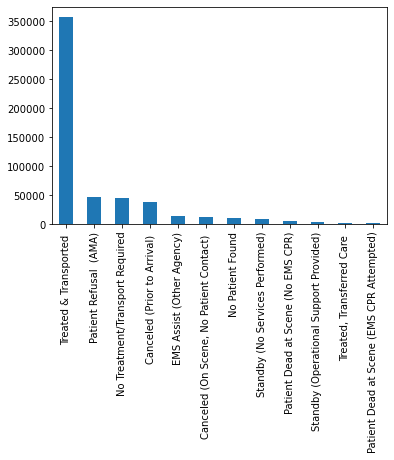

In [8]:
## Histogram for patient outcomes
dfPatient['PatientOutcome'].value_counts().plot(kind='bar')    

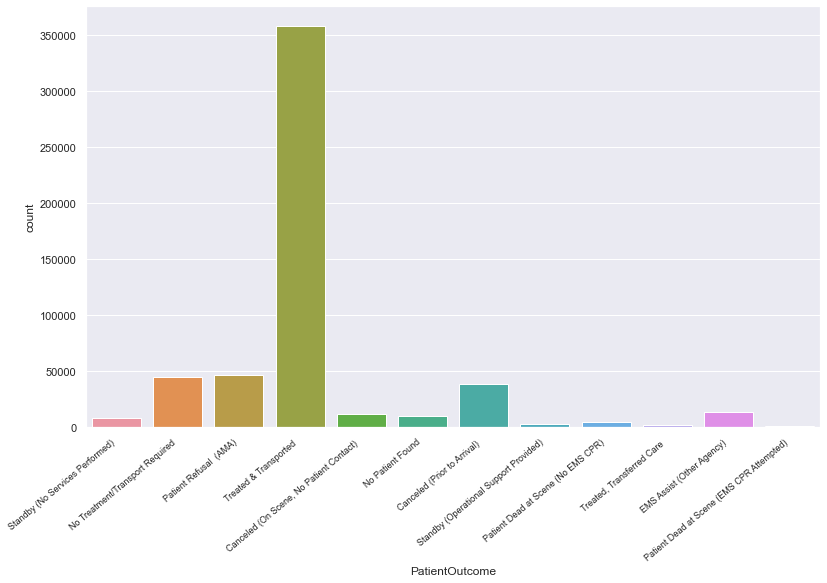

In [32]:
## Another Histogram using Seaborn - for patient outcomes
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=dfPatient['PatientOutcome'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=9)

plt.tight_layout()
plt.show()

## Numeric Analysis

### Duplicate Rows
Duplicate rows will likely need to be removed during data conditioning.

In [10]:
## Medications dataframe
#Determine which rows are duplicates (True=duplicate, False=first instance of row)
duplicateRowIdentifier=dfMed.duplicated()

#Calculate number of duplicate rows
numDuplicateRows=len(duplicateRowIdentifier[duplicateRowIdentifier==True])
numUniqueRows=numOriginalRows-numDuplicateRows

#Calculate percentage of rows that are duplicates
percentDuplicateRows=round(numDuplicateRows/len(dfMed)*100,4)

#Print results
print('Number of Duplicate Rows =')
print(numDuplicateRows)
print('Percentage of Rows that are Duplicates = ')
print(percentDuplicateRows)

Number of Duplicate Rows =
9272
Percentage of Rows that are Duplicates = 
14.6452


Duplicate rows will be removed before conducting the remaining analysis in this script.

In [11]:
#Medication Dataset - Reduce to the rows that were not flagged as duplicates
dfMed=dfMed.loc[duplicateRowIdentifier==False,:]

#Confirm
print('Expected Number of Rows = '+str(numUniqueRows))
print('Updated Data Frame Shape =')
print(dfMed.shape)

Expected Number of Rows = 535788
Updated Data Frame Shape =
(54039, 4)


### Unique Values Per Column
This is a simple calculation of the number of unique values per individual column.

In [12]:
# Medication dataset -- Calculate the number of unique values per columns (NULL counts as a value)
dsNumUnique=dfMed.nunique(dropna=False)
dsNumUnique.name='Number of Unique Values'
print(dsNumUnique)

PatientId                          38501
Medication_Given_RXCUI_Code           33
Medication_Given_Description          33
Personnel_Performer_ID_Internal      845
Name: Number of Unique Values, dtype: int64


### Null Values Per Column
This is a simple calculation of the number/percentage of null values per individual column.

In [13]:
#Medication dataset - Calculate the number of null values per columns
dsNumNull=dfMed.isnull().sum()
dsNumNull.name='Number Rows With Nulls'
print(dsNumNull)

PatientId                          0
Medication_Given_RXCUI_Code        6
Medication_Given_Description       6
Personnel_Performer_ID_Internal    0
Name: Number Rows With Nulls, dtype: int64


In [14]:
#Calculate the percentage of null values per columns
dsPercentNull=(dsNumNull/numUniqueRows*100).round(2)
dsPercentNull.name='Percent Rows With Nulls'
print(dsPercentNull)

PatientId                          0.0
Medication_Given_RXCUI_Code        0.0
Medication_Given_Description       0.0
Personnel_Performer_ID_Internal    0.0
Name: Percent Rows With Nulls, dtype: float64


In [15]:
#Merge data series (by column) together
dfPerCol=pd.DataFrame()
dfPerCol[dsNumUnique.name]=dsNumUnique
dfPerCol[dsNumNull.name]=dsNumNull
dfPerCol[dsPercentNull.name]=dsPercentNull

### Null Values Per Row
This section determines which columns have a null value per each row, resulting in a data series matching the number of unique rows in the dataset. The series values are tuples of column names. The resulting table shows the unique tuples of column names with their corresponding row count. Once the data subsets for the project questions are determined, this will help inform the completeness of those data subsets.

In [16]:
#Medication dataset -- For a single row, determine which columns have null values
def NullsPerRow(dsRow):  
    columnsNull=list(dsRow[dsRow.isnull()].index)
    columnsNull.sort()
    columnsNull=tuple(columnsNull) #used tuple since lists can't be used by pandas unique()
    return(columnsNull)
dsNulls=dfMed.apply(NullsPerRow,axis=1)

#Create data frame for counting 
dfNulls=pd.DataFrame(dsNulls.unique(),columns=['Columns With Null'])
dfNulls['Number of Rows']=0

#Count the number of rows per each tuple of null columns
for index in dfNulls.index:
    dfNulls.loc[index,'Number of Rows']=len(dsNulls[dsNulls==dfNulls.loc[index,'Columns With Null']])
dfNulls.sort_values(by='Number of Rows',ascending=False,inplace=True)
dfNulls.reset_index(drop=True,inplace=True)

#Add a column for percent of rows
dfNulls['Percent of Rows']=(dfNulls['Number of Rows']/numUniqueRows*100).round(2)
dfNulls

,Columns With Null,Number of Rows,Percent of Rows
0,(),54033,10.08
1,"(Medication_Given_Description, Medication_Give...",6,0.00


## Visualizations

In [17]:
### For Medication Dataset Visualization
print(sheetNameMed+' Dataset\n')
print('Original Number of Rows = '+str(numOriginalRows))
print('Duplicate Number of Rows = '+str(numDuplicateRows))
print('Percent Duplicate Rows = '+str(percentDuplicateRows)+'\n')
print('Duplicate rows removed prior to remaining analysis')
print('Unique Number of Rows = '+str(numUniqueRows)+'\n')

Medications Dataset

Original Number of Rows = 545060
Duplicate Number of Rows = 9272
Percent Duplicate Rows = 14.6452

Duplicate rows removed prior to remaining analysis
Unique Number of Rows = 535788



In [18]:
dfPerCol

,Number of Unique Values,Number Rows With Nulls,Percent Rows With Nulls
PatientId,38501,0,0.0
Medication_Given_RXCUI_Code,33,6,0.0
Medication_Given_Description,33,6,0.0
Personnel_Performer_ID_Internal,845,0,0.0


In [19]:
dfNulls

,Columns With Null,Number of Rows,Percent of Rows
0,(),54033,10.08
1,"(Medication_Given_Description, Medication_Give...",6,0.00


In [20]:
## Needs to install 1st time only to setup your environment
##pip install -U pandasql

In [21]:
## You will need to 'pip' install 'pandasql' to import 'sqldf'
from pandasql import sqldf

In [22]:
## For Medication Dataset
output = sqldf("select count(*) from dfMed")

In [23]:
output = sqldf("select * from dfMed where PatientId='480444'")
output

,PatientId,Medication_Given_RXCUI_Code,Medication_Given_Description,Personnel_Performer_ID_Internal
0,480444,6960.0,Midazolam (Versed),78C0656B-4FD3-4AFD-8907-05258241F20A
1,480444,7242.0,Naloxone (Narcan),78C0656B-4FD3-4AFD-8907-05258241F20A
2,480444,6130.0,Ketamine (Ketalar),78C0656B-4FD3-4AFD-8907-05258241F20A


##### Query to verify duplicate exists in TABLE - Procedures

In [24]:
## From Procedure dataset
output = sqldf("SELECT Procedure_Performed_Description, FRDPersonnelID, COUNT(*) FROM dfProc GROUP BY Procedure_Performed_Description, FRDPersonnelID HAVING COUNT(*) > 1")
##output['Procedure_Performed_Description']  
output

,Procedure_Performed_Description,FRDPersonnelID,COUNT(*)
0,Airway - Clear/Suction,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,3
1,Airway - Clear/Suction,0A89F8EB-32DE-4505-9DCA-CF9C68E09DCE,8
2,Airway - Clear/Suction,0FC6D8A5-B755-49AF-B4FE-073AA2CEC1E8,3
3,Airway - Clear/Suction,10D6C99E-9E01-E211-B5F5-78E7D18CFD3C,2
4,Airway - Clear/Suction,11D9C99E-9E01-E211-B5F5-78E7D18CFD3C,5
...,...,...,...
6264,Wound Care - Irrigation,EDD7C99E-9E01-E211-B5F5-78E7D18CFD3C,2
6265,Wound Care - Irrigation,F315435F-8AB8-4C8E-8384-A37C2F166C98,2
6266,Wound Care - Irrigation,F9D3C99E-9E01-E211-B5F5-78E7D18CFD3C,3
6267,Wound Care - Irrigation,F9D6C99E-9E01-E211-B5F5-78E7D18CFD3C,3


##### List All Rows Containing Duplicates from TABLE - Procedures

In [25]:
output2 = sqldf("SELECT a.* FROM dfProc a JOIN (SELECT Procedure_Performed_Description, FRDPersonnelID, COUNT(*) FROM dfProc GROUP BY Procedure_Performed_Description, FRDPersonnelID HAVING count(*) > 5 ) b ON a.Procedure_Performed_Description = b.Procedure_Performed_Description AND a.FRDPersonnelID = b.FRDPersonnelID ORDER BY a.FRDPersonnelID")
output2

,PatientId,Procedure_Performed_Code,Procedure_Performed_Description,FRDPersonnelID
0,485162,392230005,IV Start - Extremity Vein (arm or leg),00D5C99E-9E01-E211-B5F5-78E7D18CFD3C
1,487722,392230005,IV Start - Extremity Vein (arm or leg),00D5C99E-9E01-E211-B5F5-78E7D18CFD3C
2,487306,392230005,IV Start - Extremity Vein (arm or leg),00D5C99E-9E01-E211-B5F5-78E7D18CFD3C
3,487306,268400002,CV - ECG - 12 Lead Obtained,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C
4,487306,268400002,CV - ECG - 12 Lead Obtained,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C
...,...,...,...,...
154903,912945,392230005,IV Start - Extremity Vein (arm or leg),FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C
154904,922834,392230005,IV Start - Extremity Vein (arm or leg),FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C
154905,1001082,392230005,IV Start - Extremity Vein (arm or leg),FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C
154906,1066726,392230005,IV Start - Extremity Vein (arm or leg),FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C


In [26]:
##### Query to verify duplicate exists for FirePerson in TABLE - Patients

In [27]:
outputP1 = sqldf("SELECT FRDPersonnelID, FRDPersonnelGender,FRDPersonnelStartDate, COUNT(*) as Total FROM dfPatient GROUP BY FRDPersonnelID, FRDPersonnelID HAVING COUNT(*) > 1 ORDER BY Total desc")
outputP1 

,FRDPersonnelID,FRDPersonnelGender,FRDPersonnelStartDate,Total
0,DA8ED993-E0AB-4521-8FF6-54B423A95B2B,Male,2017-04-17 00:00:00.000000,2765
1,2AD4C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,2002-10-21 00:00:00.000000,2615
2,54D7C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,1991-06-03 00:00:00.000000,2546
3,D6D4C99E-9E01-E211-B5F5-78E7D18CFD3C,Female,2002-07-13 00:00:00.000000,2145
4,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,1997-08-18 00:00:00.000000,2136
...,...,...,...,...
1780,DDD8C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,2002-05-06 00:00:00.000000,2
1781,E3D4C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,1987-09-21 00:00:00.000000,2
1782,E3D8C99E-9E01-E211-B5F5-78E7D18CFD3C,Male,1997-12-08 00:00:00.000000,2
1783,F3F2340E-F875-E511-80CD-001DD8B71D38,Male,2014-09-15 00:00:00.000000,2


##### List FRDPersonnelID,FRDPersonnelStartDate, FRDPersonnelGender  Rows to check for  Duplicates from TABLE - Patients

In [28]:
outputPatient = sqldf("SELECT a.FRDPersonnelID, a.FRDPersonnelStartDate, a.FRDPersonnelGender  FROM dfPatient a JOIN (SELECT FRDPersonnelID, FRDPersonnelGender,FRDPersonnelStartDate, COUNT(*) FROM dfPatient GROUP BY FRDPersonnelID, FRDPersonnelStartDate HAVING count(*) > 1 ) b ON a.FRDPersonnelID = b.FRDPersonnelID ORDER BY a.FRDPersonnelID;")
outputPatient

,FRDPersonnelID,FRDPersonnelStartDate,FRDPersonnelGender
0,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,2008-04-28 00:00:00.000000,Male
1,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,2008-04-28 00:00:00.000000,Male
2,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,2008-04-28 00:00:00.000000,Male
3,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,2008-04-28 00:00:00.000000,Male
4,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,2008-04-28 00:00:00.000000,Male
...,...,...,...
545001,FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C,1988-08-15 00:00:00.000000,Male
545002,FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C,1988-08-15 00:00:00.000000,Male
545003,FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C,1988-08-15 00:00:00.000000,Male
545004,FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C,1988-08-15 00:00:00.000000,Male


### Checking 'date' formats for confirmity

In [29]:
##Ignoring an invalid 'DispatchTime' value 
##dfPatient['DispatchTime'] = pd.to_datetime(dfPatient['DispatchTime'], errors='ignore')

##Changing an invalid 'DispatchTime' value to NaN
dfPatient['DispatchTime'] = pd.to_datetime(dfPatient['DispatchTime'], errors='coerce')
dfPatient


,PatientId,FRDPersonnelID,Shift,UnitId,FireStation,Battalion,PatientOutcome,PatientGender,CrewMemberRoles,DispatchTime,FRDPersonnelGender,FRDPersonnelStartDate
0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,"Primary Patient Caregiver-At Scene,Primary Pat...",2018-01-01 00:29:02,Male,1997-08-18
1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38,A - Shift,M404,4,401,Standby (No Services Performed),NaN,"Driver-Transport,Other Patient Caregiver-At Scene",2018-01-01 00:29:02,Male,2007-02-19
2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,"Intern/Student,Other Patient Caregiver-At Scen...",2018-01-01 00:29:02,Male,2008-08-18
3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,"Primary Patient Caregiver-At Scene,Primary Pat...",2018-01-01 00:40:54,Male,2011-10-24
4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,"Driver-Response,Driver-Transport",2018-01-01 00:40:54,Male,2012-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...
545055,1465126,54D6C99E-9E01-E211-B5F5-78E7D18CFD3C,B - Shift,M441,41,407,Patient Refusal (AMA),Male,"Driver-Response,Driver-Transport,Other Patient...",2021-02-03 12:32:08,Male,2007-06-11
545056,1465127,3D301E03-D619-E511-80CA-001DD8B71D38,B - Shift,M423,23,404,Treated & Transported,Male,"Primary Patient Caregiver-At Scene,Primary Pat...",2021-02-03 14:13:14,Male,2015-01-12
545057,1465127,C3462F9F-F913-E411-A585-F305C4522FCB,B - Shift,M423,23,404,Treated & Transported,Male,"Driver-Response,Driver-Transport,Other Patient...",2021-02-03 14:13:14,Male,2014-01-13
545058,1465128,15ECF548-F692-E211-A596-78E7D18C3D20,B - Shift,M425,25,401,Treated & Transported,Male,"Primary Patient Caregiver-Transport,Primary Pa...",2021-02-03 14:17:59,Female,2012-09-24


#### Finding the count of non-NA value across the row axis
Syntax: DataFrame.count(axis=0, level=None, numeric_only=False)
<BR>Parameters:
<BR>axis : 0 or ‘index’ for row-wise, 1 or ‘columns’ for column-wise
<BR>level : If the axis is a MultiIndex (hierarchical), count along a particular level, collapsing into a DataFrame
<BR>numeric_only : Include only float, int, boolean data

In [30]:
##find the number of non-NA/null value across the row axis in 'dfPatient' dataframe
dfPatient.count(axis = 0) 

PatientId                545060
FRDPersonnelID           545059
Shift                    545060
UnitId                   545060
FireStation              545060
Battalion                545060
PatientOutcome           545058
PatientGender            413976
CrewMemberRoles          545060
DispatchTime             542791
FRDPersonnelGender       543800
FRDPersonnelStartDate    543800
dtype: int64

In [31]:
# Count total NaN at each column in the DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", dfPatient.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 PatientId                     0
FRDPersonnelID                1
Shift                         0
UnitId                        0
FireStation                   0
Battalion                     0
PatientOutcome                2
PatientGender            131084
CrewMemberRoles               0
DispatchTime               2269
FRDPersonnelGender         1260
FRDPersonnelStartDate      1260
dtype: int64


So, we can see datetime column 'DispatchTime' has '2269' NaN values.